# Redes Neurais Convolucionais (Convolutional Neural Networks - CNN)
### Redes Neurais Convolucionais (CNNs) são um tipo de rede neural profunda projetada para processar dados que têm uma grade-like topology, como imagens (que podem ser vistas como uma grade de pixels). As CNNs são fundamentais no campo do processamento de imagens e visão computacional.

## Como funciona
* Camadas Convolucionais: Estas camadas aplicam um número de filtros à imagem de entrada para criar um mapa de características. Estes filtros ajudam a CNN a identificar padrões, como bordas, texturas, ou formas complexas.

* Função de Ativação: Geralmente, após cada operação de convolução, uma função de ativação (como ReLU) é aplicada para introduzir não-linearidades no modelo, permitindo-lhe aprender padrões mais complexos.

* Pooling: As camadas de pooling são usadas para reduzir as dimensões espaciais (largura e altura) do mapa de características, ajudando a diminuir a quantidade de parâmetros e cálculos na rede.

* Camadas Densas (Fully Connected Layers): Após várias camadas convolucionais e de pooling, a rede utiliza camadas densas onde cada entrada está conectada a cada saída. Estas camadas são usadas para classificar os recursos extraídos pelas camadas convolucionais e de pooling em categorias.

* Output: A última camada densa utiliza uma função de ativação como softmax (para classificação multiclasse) para produzir as probabilidades de cada classe.

![image.png](cnn.png)

### Vantagens
* Eficiência no Processamento de Imagens: As CNNs podem capturar automaticamente e aprender características importantes das imagens, o que as torna extremamente eficientes para tarefas de processamento de imagens e visão computacional.

* Requer Menos Pré-processamento: Ao contrário de outros algoritmos de classificação, as CNNs não exigem tanto pré-processamento dos dados. Elas são capazes de aprender os filtros e características por conta própria.

* Robustez a Variações Espaciais: As CNNs são robustas a variações e distorções espaciais nas imagens, como rotação ou escala.

### Desvantagens
* Grande Quantidade de Dados Necessária: Para que as CNNs aprendam eficientemente, uma grande quantidade de dados de treinamento é geralmente necessária.

* Complexidade Computacional: As CNNs podem ser bastante complexas e exigir um poder computacional significativo, especialmente para tarefas mais complexas.

* Risco de Sobreajuste: Em datasets menores, as CNNs correm o risco de sobreajustar os dados de treinamento.

## Aplicações
### Reconhecimento de Imagens:
* Identificação de Objetos: CNNs são amplamente usadas em sistemas de reconhecimento de objetos para detectar e classificar objetos em imagens.
        Reconhecimento Facial: Aplicações como autenticação biométrica e marcação de pessoas em fotos.

### Segmentação de Imagens:
* Segmentação Semântica: Divisão de uma imagem em regiões semânticas, atribuindo rótulos a cada região.
* Segmentação de Instância: Identificação e rotulação de objetos individuais em uma imagem.

### Classificação de Imagens Médicas:
* Diagnóstico de Doenças: Identificação de padrões em imagens médicas para auxiliar no diagnóstico de condições como câncer.

### Reconhecimento de Vídeos:
* Análise de Vídeos: Rastreamento de objetos em sequências de vídeo, identificação de atividades, etc.

### Geração de Imagens:
* GANs (Redes Generativas Adversariais): CNNs são usadas em GANs para gerar imagens realistas.

### Veículos Autônomos:
* Percepção de Ambiente: CNNs são cruciais para sistemas de veículos autônomos, ajudando na detecção de pedestres, veículos, sinais de trânsito, etc.

### Análise de Sentimentos em Imagens:
* Classificação de Expressões Faciais: Identificação de emoções em rostos humanos em imagens.

### Reconhecimento de Texto em Imagens:
* OCR (Optical Character Recognition): Extrair texto de imagens para converter em texto editável.

### Filtros de Imagens:
* Aplicações Criativas: CNNs são usadas em aplicativos de edição de imagens para aplicar filtros, reconhecimento de estilo artístico, etc.

### Detecção de Anomalias:

* Identificação de Padrões Anômalos: CNNs são usadas para detectar anomalias em imagens, útil em inspeções industriais, por exemplo.

#### Exemplo de código com CNN

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

2023-12-06 15:05:13.688883: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# Reshape data for CNN (add a channel dimension)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


#### Construção do modelo

In [6]:
# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

2023-12-06 15:05:26.409054: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
938/938 [==============================] - 190s 202ms/step - loss: 0.1693 - accuracy: 0.9484 - val_loss: 0.0514 - val_accuracy: 0.9836
Epoch 2/5
938/938 [==============================] - 183s 195ms/step - loss: 0.0494 - accuracy: 0.9847 - val_loss: 0.0326 - val_accuracy: 0.9897
Epoch 3/5
938/938 [==============================] - 184s 197ms/step - loss: 0.0341 - accuracy: 0.9899 - val_loss: 0.0341 - val_accuracy: 0.9893
Epoch 4/5
938/938 [==============================] - 188s 201ms/step - loss: 0.0255 - accuracy: 0.9922 - val_loss: 0.0408 - val_accuracy: 0.9859
Epoch 5/5
938/938 [==============================] - 182s 194ms/step - loss: 0.0198 - accuracy: 0.9936 - val_loss: 0.0450 - val_accuracy: 0.9862


In [10]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))

313/313 [==============================] - 27s 87ms/step - loss: 0.0450 - accuracy: 0.9862
Accuracy: 98.62


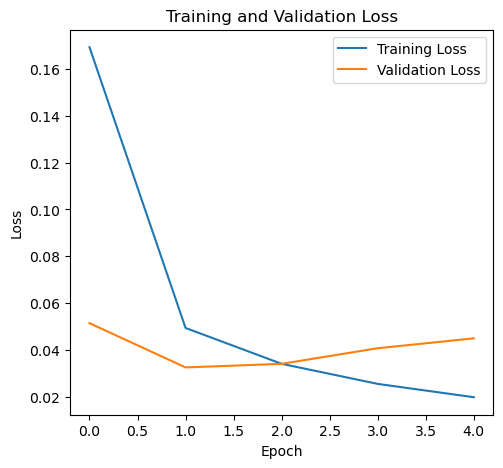

In [11]:
# Plot Training History
plt.figure(figsize=(12, 5))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

![overfitting](overfittingcnn.png)